In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Override default figure sizing:
pylab.rcParams['figure.figsize'] = (10, 6)
sns.set(color_codes = True)

In [3]:
missing_values = ["n/a", "na", "--","?"]
avocadodf=pd.read_csv('../../DATA/Avocado Prices.csv',na_values=missing_values)

## Exploratory Data Analysis - EDA

In [4]:
#head
avocadodf.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,6/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
avocadodf.shape

(18249, 14)

In [6]:
#Check for Nulls
pd.isnull(avocadodf).sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
avocadodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
# drop the Unnamed colummn as it's not needed.
avocadodf.drop(['Unnamed: 0'], axis=1, inplace=True)
avocadodf.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,6/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
avocadodf['Date']=pd.to_datetime(avocadodf['Date'])

In [10]:
avocadodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [11]:
#New columns for month, month name
Month=avocadodf['Date'].dt.month
Monthname=avocadodf['Date'].dt.month_name()
avocadodf['Month']= Month
avocadodf['MonthName']= Monthname 

In [12]:
#Create new column for season according to month
def seasoncat(month):
    winter, spring, summer, autum = ([12,1,2],[3,4,5],[6,7,8],[9,10,11])
    if month in winter:
        return 'Winter'
    elif month in spring:
        return 'Spring'
    elif month in summer:
        return 'Summer'
    else:
        return 'Autumn'

In [13]:
avocadodf['Season']= avocadodf['Month'].map(seasoncat)

In [14]:
avocadodf.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,MonthName,Season
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,December,Winter
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,December,Winter
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,December,Winter
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,June,Summer
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,November,Autumn


In [15]:
#prices according to month
monthgroup=avocadodf.groupby('MonthName')['AveragePrice'].agg(['max','min', 'mean']).sort_values('mean', ascending = True)
monthgroup

,max,min,mean
MonthName,,,
January,3.00,0.51,1.337533
December,3.05,0.49,1.345754
March,2.97,0.54,1.348275
May,2.92,0.44,1.368784
February,3.03,0.49,1.372244
April,3.17,0.51,1.384101
November,2.99,0.58,1.411204
June,3.12,0.51,1.425375
July,2.75,0.52,1.436318


In [16]:
seasongroup=avocadodf.groupby('Season')['AveragePrice'].agg(['max','min', 'mean']).sort_values('mean', ascending = True)
seasongroup

,max,min,mean
Season,,,
Winter,3.05,0.49,1.350404
Spring,3.17,0.44,1.366257
Summer,3.12,0.51,1.445006
Autumn,3.25,0.56,1.472796


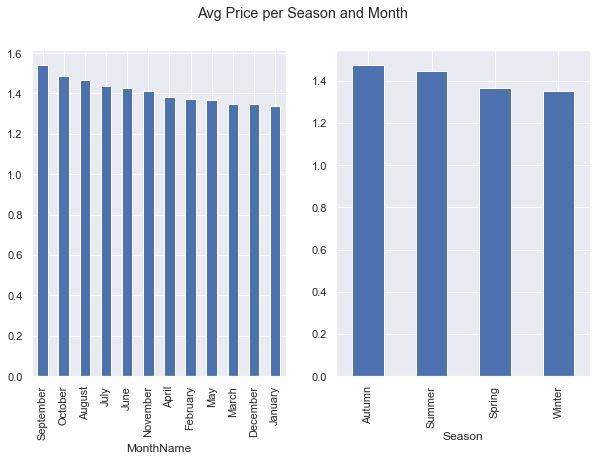

In [17]:
visualmonth = avocadodf.groupby('MonthName')['AveragePrice'].mean().sort_values(ascending=False)
visualseason = avocadodf.groupby('Season')['AveragePrice'].mean().sort_values(ascending=False)
f,ax = plt.subplots(1,2)
f.suptitle('Avg Price per Season and Month')
visualmonth.plot(kind='bar', ax=ax[0])
visualseason.plot(kind='bar', ax=ax[1])

In [138]:
Avg_volumeregion= avocadodf.groupby('region')['Total Volume'].mean()
dfavg_volumeregion= pd.DataFrame(Avg_volumeregion).reset_index()
dfavg_volumeregion = pd.DataFrame(dfavg_volumeregion.sort_values(by ='Total Volume',ascending=False))
dfavg_volumeregion.head(6)

,region,Total Volume
51,TotalUS,1.735130e+07
52,West,3.215323e+06
6,California,3.044324e+06
45,SouthCentral,2.991952e+06
29,Northeast,2.110299e+06
46,Southeast,1.820232e+06


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 <a list of 54 Text major ticklabel objects>)

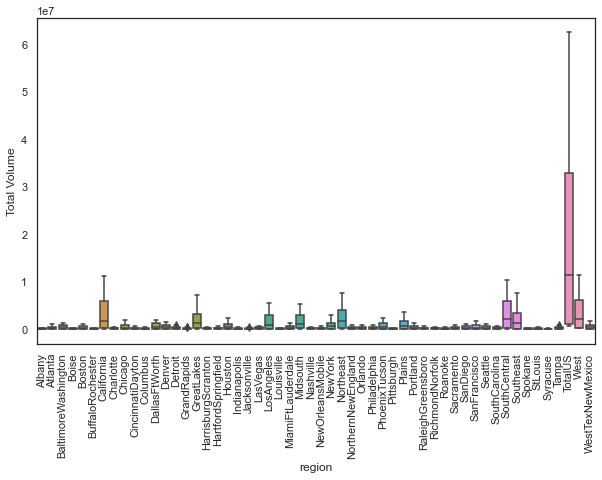

In [123]:
sns.boxplot(x='region', y = 'Total Volume', data= avocadodf)
plt.xticks(rotation=90)

TotalUS is an outlier so it'll be removed

In [143]:
#Remove TotalUS
visualvolume=dfavg_volumeregion[~dfavg_volumeregion['region'].str.contains('TotalUS')]


Text(0.5, 1.0, 'total volume by Region')

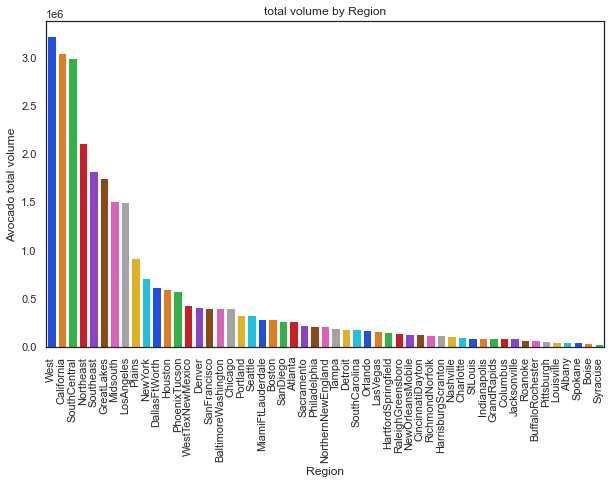

In [144]:
sns.barplot(x= 'region', y='Total Volume', data = visualvolume, palette='bright' )
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Avocado total volume')
plt.title('total volume by Region')

In [18]:
Avg_region= avocadodf.groupby('region')['AveragePrice'].mean()
dfavg_region= pd.DataFrame(Avg_region)
dfavg_region = pd.DataFrame(dfavg_region.AveragePrice.sort_values(ascending=False))
dfavg_region.head()

,AveragePrice
region,
HartfordSpringfield,1.818639
SanFrancisco,1.804201
NewYork,1.727574
Philadelphia,1.632130
Sacramento,1.621568


In [ ]:
sns.barplot(x= dfavg_region.index, y='AveragePrice', data = dfavg_region, palette='magma' )
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Avocado average Price')
plt.title('Average price by Region')

Text(0.5, 1.0, 'Average price by Region')

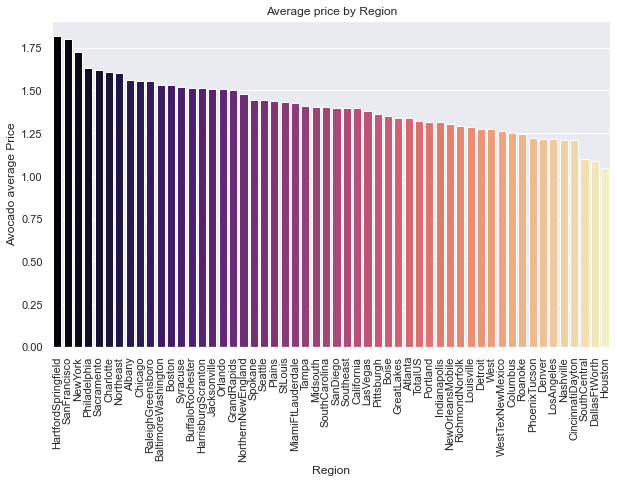

In [19]:
sns.barplot(x= dfavg_region.index, y='AveragePrice', data = dfavg_region, palette='magma' )
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Avocado average Price')
plt.title('Average price by Region')

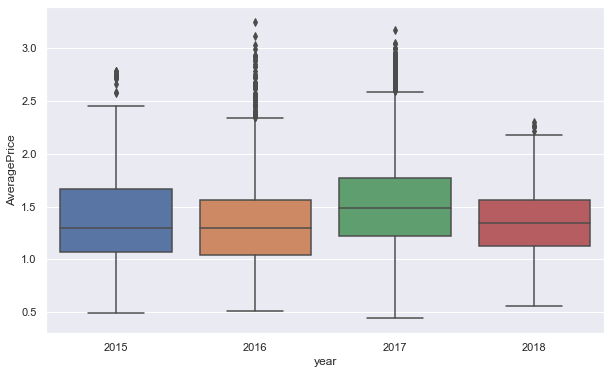

In [20]:
sns.boxplot(x='year', y = 'AveragePrice', data= avocadodf)

In [133]:
Avg_priceyear= avocadodf.groupby('year')['AveragePrice'].mean()
df_Avg_priceyear= pd.DataFrame(Avg_priceyear)
df_Avg_priceyear
#df_Avg_priceyear = pd.DataFrame(dfavg_region.AveragePrice.sort_values(ascending=False))

,AveragePrice
year,
2015,1.375590
2016,1.338640
2017,1.515128
2018,1.347531


In [135]:
Avg_volumeyear= avocadodf.groupby('year')['Total Volume'].mean()
df_Avg_volumeyear=pd.DataFrame(Avg_volumeyear)
df_Avg_volumeyear

,Total Volume
year,
2015,7.810274e+05
2016,8.584206e+05
2017,8.623393e+05
2018,1.066928e+06


Text(0.5, 1.0, 'Average price by year')

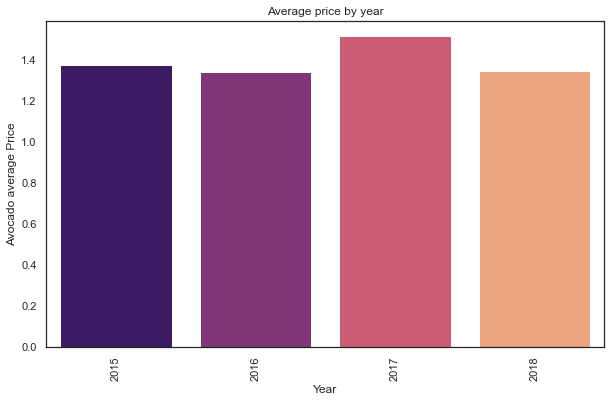

In [134]:
sns.barplot(x= df_Avg_priceyear.index, y='AveragePrice', data = df_Avg_priceyear, palette='magma' )
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Avocado average Price')
plt.title('Average price by year')

Text(0.5, 1.0, 'Average volume by year')

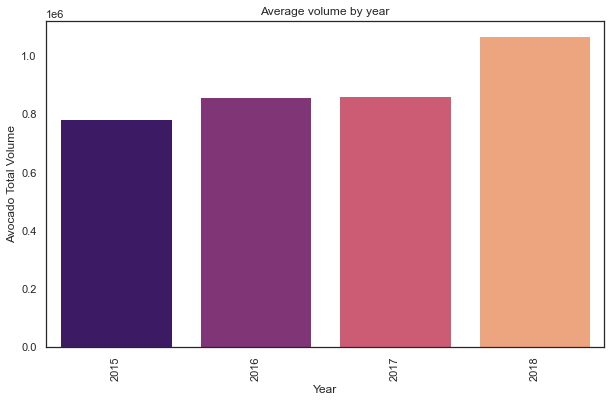

In [136]:
sns.barplot(x= df_Avg_volumeyear.index, y='Total Volume', data = df_Avg_volumeyear, palette='magma' )
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Avocado Total Volume')
plt.title('Average volume by year')

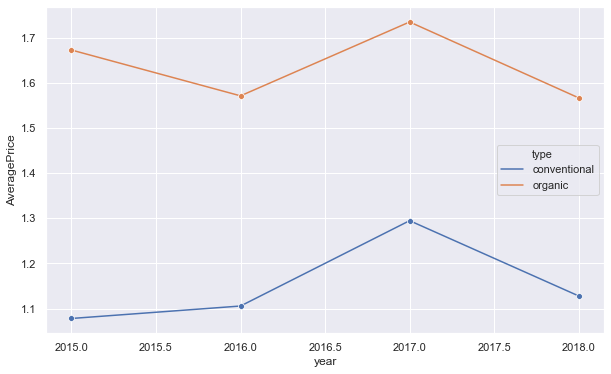

In [21]:
sns.lineplot(x='year', y='AveragePrice', hue='type' ,marker='o', ci=None, data= avocadodf)

In [22]:
x = avocadodf['AveragePrice'].value_counts(bins =5)
x

(1.002, 1.564]    9330
(1.564, 2.126]    5084
(0.436, 1.002]    2963
(2.126, 2.688]     775
(2.688, 3.25]       97
Name: AveragePrice, dtype: int64

Text(0.5, 1.0, 'Distribution of Average Price')

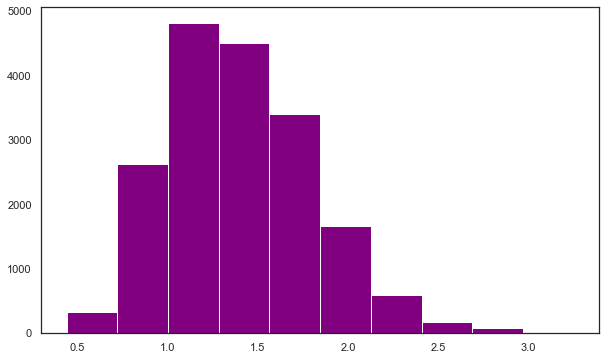

In [73]:
plt.hist(avocadodf['AveragePrice'], facecolor = 'purple')
ax.set_title('Distribution of Average Price')

In [24]:
avocado_copy=avocadodf.copy()
avocado_train=avocado_copy.sample(frac=0.60, random_state=0)
avocado_test = avocado_copy.drop(avocado_train.index)

In [25]:
avocado_copy.shape

(18249, 16)

In [26]:
avocado_train.shape

(10949, 16)

In [27]:
avocado_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10949 entries, 9181 to 481
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10949 non-null  datetime64[ns]
 1   AveragePrice  10949 non-null  float64       
 2   Total Volume  10949 non-null  float64       
 3   4046          10949 non-null  float64       
 4   4225          10949 non-null  float64       
 5   4770          10949 non-null  float64       
 6   Total Bags    10949 non-null  float64       
 7   Small Bags    10949 non-null  float64       
 8   Large Bags    10949 non-null  float64       
 9   XLarge Bags   10949 non-null  float64       
 10  type          10949 non-null  object        
 11  year          10949 non-null  int64         
 12  region        10949 non-null  object        
 13  Month         10949 non-null  int64         
 14  MonthName     10949 non-null  object        
 15  Season        10949 non-null  objec

In [28]:
avocado_test.shape

(7300, 16)

In [29]:
avocado_corr=avocadodf.corr()
avocado_corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.075134
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.015344
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.014522
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.015892
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.024220
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.013061
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.012432
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.014330
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.006182
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.098812


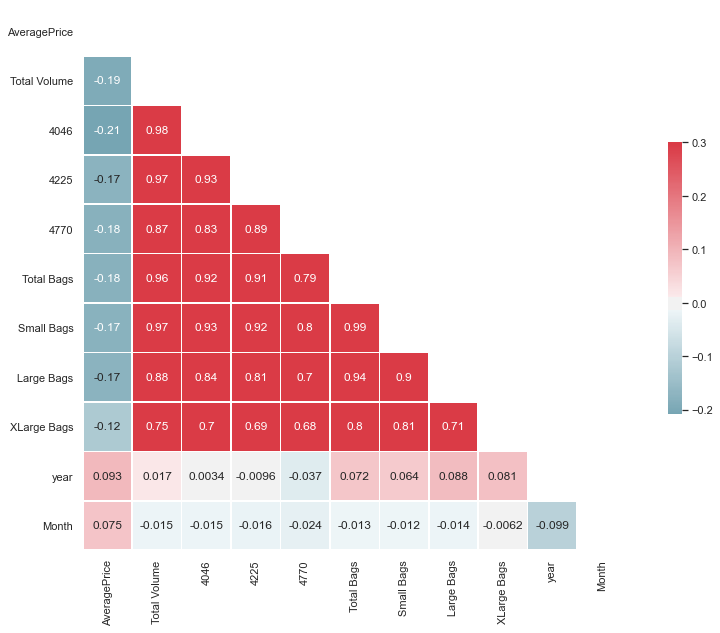

In [30]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(avocado_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(avocado_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [31]:
def draw_scatter_plot(X, Y):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(15,7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')


    plt.show();

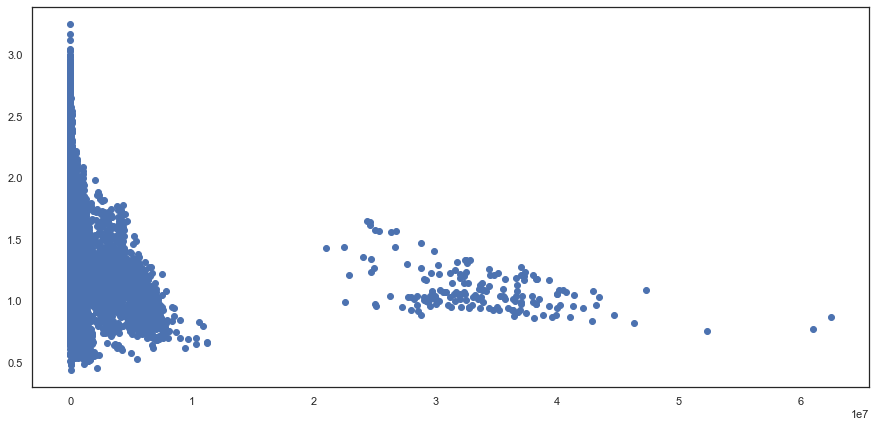

In [32]:
draw_scatter_plot(avocadodf['Total Volume'], avocadodf['AveragePrice'],)

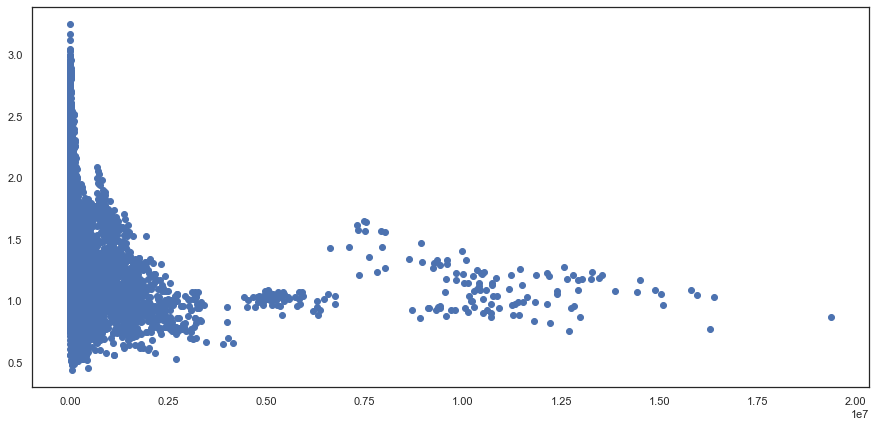

In [33]:
draw_scatter_plot(avocadodf['Total Bags'], avocadodf['AveragePrice'])

## Load datasets into database sqlite

In [34]:
import sqlite3
from pandas.io import sql
sqlite_db = 'avocado_db.sqlite'
conn = sqlite3.connect(sqlite_db) 
c = conn.cursor()

In [35]:
avocado_copy.to_sql('tavocado_copy',con=conn, if_exists='replace', index=False)
avocado_train.to_sql('tavocado_train',con=conn, if_exists='replace', index=False)
avocado_test.to_sql('tavocado_test',con=conn, if_exists='replace', index=False)

C:\Users\monic\Anaconda3\lib\site-packages\pandas\core\generic.py:2653: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [36]:
query = """
        select * 
        from tavocado_train
        limit 5;
        """

pd.read_sql_query(query,con=conn)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,MonthName,Season
0,2015-06-12 00:00:00,1.48,4400.25,1358.53,1735.98,0.00,1305.74,130.00,1175.74,0.00,organic,2015,Atlanta,6,June,Summer
1,2015-05-07 00:00:00,1.05,190716.43,4890.33,119457.27,13495.86,52872.97,30631.37,21037.53,1204.07,conventional,2015,Indianapolis,5,May,Spring
2,2016-03-20 00:00:00,1.27,1045450.41,105069.07,352698.21,9425.64,578257.49,252881.52,325375.97,0.00,organic,2016,TotalUS,3,March,Spring
3,2017-10-09 00:00:00,2.15,9883.59,313.75,4230.58,0.00,5339.26,2166.91,3172.35,0.00,organic,2017,CincinnatiDayton,10,October,Autumn
4,2018-01-14 00:00:00,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.00,organic,2018,WestTexNewMexico,1,January,Winter


In [37]:
query = """
        select * 
        from tavocado_train
        ;
        """

train= pd.read_sql_query(query,con=conn)
train

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,MonthName,Season
0,2015-06-12 00:00:00,1.48,4400.25,1358.53,1735.98,0.00,1305.74,130.00,1175.74,0.00,organic,2015,Atlanta,6,June,Summer
1,2015-05-07 00:00:00,1.05,190716.43,4890.33,119457.27,13495.86,52872.97,30631.37,21037.53,1204.07,conventional,2015,Indianapolis,5,May,Spring
2,2016-03-20 00:00:00,1.27,1045450.41,105069.07,352698.21,9425.64,578257.49,252881.52,325375.97,0.00,organic,2016,TotalUS,3,March,Spring
3,2017-10-09 00:00:00,2.15,9883.59,313.75,4230.58,0.00,5339.26,2166.91,3172.35,0.00,organic,2017,CincinnatiDayton,10,October,Autumn
4,2018-01-14 00:00:00,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.00,organic,2018,WestTexNewMexico,1,January,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10944,2017-07-05 00:00:00,1.98,21056.26,82.39,1772.56,0.00,19201.31,16567.99,2633.32,0.00,organic,2017,Boston,7,July,Summer
10945,2016-02-10 00:00:00,1.52,291185.37,18423.35,222357.93,3193.18,47210.91,47207.35,3.56,0.00,conventional,2016,NorthernNewEngland,2,February,Winter
10946,2018-11-03 00:00:00,1.44,48044.77,1885.84,6874.81,96.69,39187.43,39177.43,10.00,0.00,organic,2018,BaltimoreWashington,11,November,Autumn
10947,2016-10-16 00:00:00,1.95,16843.53,824.95,9095.02,680.30,6243.26,6226.14,17.12,0.00,organic,2016,BaltimoreWashington,10,October,Autumn


In [38]:
from pandas import DataFrame
df_train= pd.DataFrame(train)

In [40]:
query = """
        select * 
        from tavocado_test
        ;
        """

test= pd.read_sql_query(query,con=conn)
test

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,MonthName,Season
0,2015-12-20 00:00:00,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,December,Winter
1,2015-12-13 00:00:00,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,December,Winter
2,2015-06-12 00:00:00,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,June,Summer
3,2015-11-29 00:00:00,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,November,Autumn
4,2015-11-15 00:00:00,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany,11,November,Autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7295,2018-04-03 00:00:00,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico,4,April,Spring
7296,2018-02-25 00:00:00,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico,2,February,Winter
7297,2018-02-18 00:00:00,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico,2,February,Winter
7298,2018-04-02 00:00:00,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,April,Spring


In [41]:
df_test= pd.DataFrame(test)

In [42]:
query = """
        select * 
        from tavocado_copy
        ;
        """

copy= pd.read_sql_query(query,con=conn)
copy

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,MonthName,Season
0,2015-12-27 00:00:00,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,December,Winter
1,2015-12-20 00:00:00,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,December,Winter
2,2015-12-13 00:00:00,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,December,Winter
3,2015-06-12 00:00:00,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,June,Summer
4,2015-11-29 00:00:00,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,November,Autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-04-02 00:00:00,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,April,Spring
18245,2018-01-28 00:00:00,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,January,Winter
18246,2018-01-21 00:00:00,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,January,Winter
18247,2018-01-14 00:00:00,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,January,Winter


In [43]:
df_copy= pd.DataFrame(copy)
df_copy.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,MonthName,Season
0,2015-12-27 00:00:00,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,December,Winter
1,2015-12-20 00:00:00,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,December,Winter
2,2015-12-13 00:00:00,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,December,Winter
3,2015-06-12 00:00:00,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,June,Summer
4,2015-11-29 00:00:00,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,November,Autumn


## Categorical features

In [44]:
df_copy_typedummies=pd.get_dummies(df_copy['type'], prefix='type', drop_first=True)
df_copy_typedummies.head()

,type_organic
0,0
1,0
2,0
3,0
4,0


In [45]:
df_copy=pd.concat([df_copy,df_copy_typedummies],1)
df_copy.head()
#drop the original column
#df_train.drop(['type'], axis=1, inplace=True)


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,MonthName,Season,type_organic
0,2015-12-27 00:00:00,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,December,Winter,0
1,2015-12-20 00:00:00,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,December,Winter,0
2,2015-12-13 00:00:00,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,December,Winter,0
3,2015-06-12 00:00:00,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,June,Summer,0
4,2015-11-29 00:00:00,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,November,Autumn,0


In [46]:
df_copy_region_dummies=pd.get_dummies(df_copy['region'], prefix='region', drop_first=True)

In [47]:
df_copy=pd.concat([df_copy,df_copy_region_dummies],1)
df_copy.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,2015-12-27 00:00:00,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2015-12-20 00:00:00,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2015-12-13 00:00:00,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2015-06-12 00:00:00,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2015-11-29 00:00:00,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df_copy_year_dummies=pd.get_dummies(df_copy['year'], prefix='year', drop_first=True )
df_copy=pd.concat([df_copy,df_copy_year_dummies],1)
df_copy.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,year_2016,year_2017,year_2018
0,2015-12-27 00:00:00,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2015-12-20 00:00:00,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2015-12-13 00:00:00,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2015-06-12 00:00:00,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2015-11-29 00:00:00,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df_copy.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month', 'MonthName', 'Season', 'type_organic',
       'region_Atlanta', 'region_BaltimoreWashington', 'region_Boise',
       'region_Boston', 'region_BuffaloRochester', 'region_California',
       'region_Charlotte', 'region_Chicago', 'region_CincinnatiDayton',
       'region_Columbus', 'region_DallasFtWorth', 'region_Denver',
       'region_Detroit', 'region_GrandRapids', 'region_GreatLakes',
       'region_HarrisburgScranton', 'region_HartfordSpringfield',
       'region_Houston', 'region_Indianapolis', 'region_Jacksonville',
       'region_LasVegas', 'region_LosAngeles', 'region_Louisville',
       'region_MiamiFtLauderdale', 'region_Midsouth', 'region_Nashville',
       'region_NewOrleansMobile', 'region_NewYork', 'region_Northeast',
       'region_NorthernNewEngland', 'region_Orlando', 'region_Philadelphia',
      

In [149]:
df_corr=df_copy.corr()

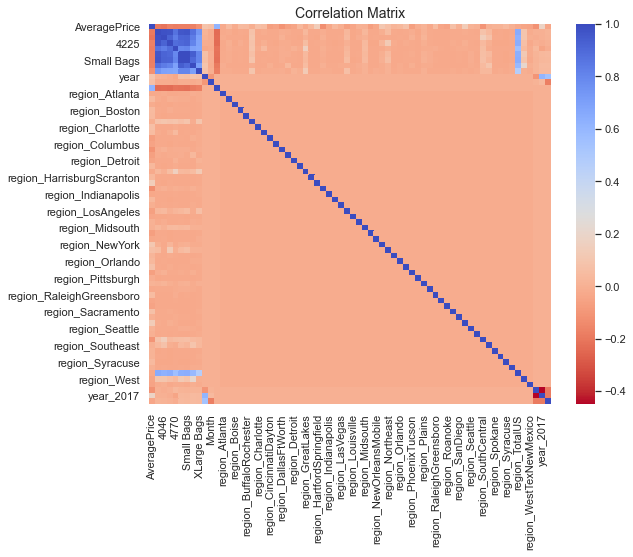

In [150]:
f, ax = plt.subplots(1, 1, figsize=(9,7))
sns.heatmap(df_corr, cmap='coolwarm_r', annot_kws={'size':10}, ax=ax)
ax.set_title("Correlation Matrix", fontsize=14)
plt.show()

## Set Target Variable

In [52]:
#target variable for price
y=df_copy['AveragePrice']

In [53]:
y.head()
y.shape

(18249,)

## Set predictor variable

In [54]:
#check correlation and chose the featuress which are more correlated with my target price
df_copy.corr()['AveragePrice'].sort_values(ascending=False).head(10)

AveragePrice                  1.000000
type_organic                  0.615845
year_2017                     0.183200
region_HartfordSpringfield    0.140782
region_SanFrancisco           0.135856
region_NewYork                0.109714
year                          0.093197
region_Philadelphia           0.077153
Month                         0.075134
region_Sacramento             0.073550
Name: AveragePrice, dtype: float64

In [155]:
df_copy.corr()['AveragePrice'].sort_values(ascending=True).head(10)

4046             -0.208317
Total Volume     -0.192752
4770             -0.179446
Total Bags       -0.177088
Small Bags       -0.174730
Large Bags       -0.172940
4225             -0.172928
region_Houston   -0.122151
XLarge Bags      -0.117592
year_2016        -0.111502
Name: AveragePrice, dtype: float64

In [56]:
#Set predictor variable
#drop columns in X not needed
X = df_copy.drop(['AveragePrice','Date','type','region', 'Month', 'MonthName', 'Season','year'], axis=1)


In [57]:
X.head()
print(X.shape)
X.columns

(18249, 65)


Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type_organic', 'region_Atlanta',
       'region_BaltimoreWashington', 'region_Boise', 'region_Boston',
       'region_BuffaloRochester', 'region_California', 'region_Charlotte',
       'region_Chicago', 'region_CincinnatiDayton', 'region_Columbus',
       'region_DallasFtWorth', 'region_Denver', 'region_Detroit',
       'region_GrandRapids', 'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelphia', 'region_PhoenixTucson', 'region_Pittsburgh',
       'region_Plains', 'region_Portland', 'region

## Using linear regresion to create a model

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [59]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [60]:
# Build and fit the model
lr=LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [61]:
print(lr.coef_, lr.intercept_)

[ 1.18278093e-05 -1.18303011e-05 -1.18417339e-05 -1.18112697e-05
 -4.59829341e-02  4.59711127e-02  4.59710435e-02  4.59724257e-02
  4.92924733e-01 -2.19715731e-01 -3.47430586e-02 -1.88436059e-01
 -5.11360215e-02 -4.24102701e-02 -1.73555967e-01  4.44306744e-02
  6.72000490e-03 -3.55174300e-01 -3.14579338e-01 -4.81461110e-01
 -3.20870458e-01 -2.94054894e-01 -5.47126743e-02 -2.53146663e-01
 -4.93976871e-02  2.42776858e-01 -5.03451265e-01 -2.45518621e-01
 -4.61622121e-02 -1.77085020e-01 -3.57576819e-01 -2.80222800e-01
 -1.39874171e-01 -1.60516283e-01 -3.37284357e-01 -2.59052691e-01
  1.73644440e-01  5.58222002e-02 -8.44864739e-02 -3.95909607e-02
  8.04889387e-02 -3.27152052e-01 -1.93194913e-01 -1.27605805e-01
 -2.49158437e-01 -6.25260403e-03 -2.80552766e-01 -3.08084432e-01
  5.78662988e-02 -1.52931173e-01  2.28280791e-01 -1.42734061e-01
 -1.54122576e-01 -4.70131505e-01 -1.59532034e-01 -1.34810883e-01
 -1.39344576e-01 -4.24850560e-02 -1.47403675e-01 -2.07094269e-01
 -2.62367672e-01 -2.91040

In [62]:
lr_coefdf =pd.DataFrame({'feature': X.columns, 'coefficient': lr.coef_})
lr_coefdf.sort_values(by = 'coefficient',ascending=False).head(10)

,feature,coefficient
8,type_organic,0.492925
25,region_HartfordSpringfield,0.242777
50,region_SanFrancisco,0.228281
36,region_NewYork,0.173644
63,year_2017,0.133268
40,region_Philadelphia,0.080489
48,region_Sacramento,0.057866
37,region_Northeast,0.055822
7,XLarge Bags,0.045972
5,Small Bags,0.045971


#### Evaluete coefficients

In [105]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': lr.coef_,
                                'abs_coef': np.abs(lr.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)
    plt.xticks(rotation=90)

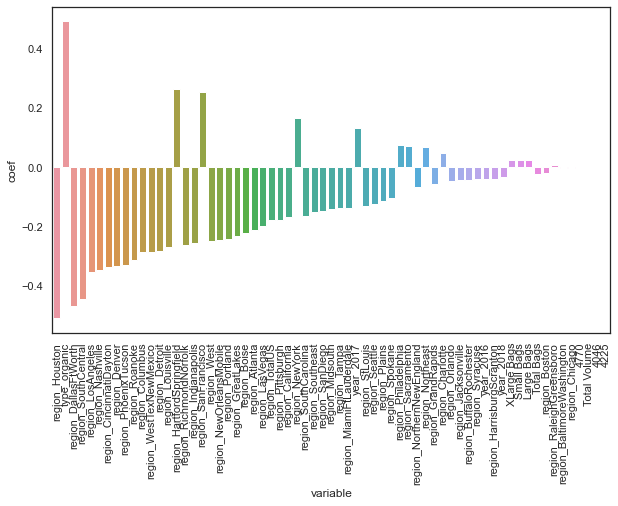

In [106]:
view_coeff(X, lr)

In [69]:
#y_train.shape
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)
print(X_test.shape)
#print(y_trainpreds.shape)

(12774, 65)
(12774,)
(5475,)
(5475, 65)


## Predictions using Linear Regression

In [70]:
#predictions from lr - training data
y_trainpreds = lr.predict(X_train)
print(y_trainpreds[:10])
print(y_trainpreds.shape)

[0.7441038  1.11777693 1.1469984  1.10434011 1.49200667 1.11898781
 1.21511766 1.62897474 1.14608139 1.23477499]
(12774,)


In [71]:
#predictions from lr - testing data
y_testpreds = lr.predict(X_test)
print(y_testpreds[:10])
print(y_testpreds.shape)

[0.9434841  1.13862343 1.59810633 0.99232042 1.72321327 1.46483997
 1.70523858 0.84776684 1.78149418 1.26897951]
(5475,)


## Evaluation of Model

In [72]:
# Ploting of model of difference betwwen actual and predicted for trining data to evaluate rsquare
train_plot = pd.DataFrame({'Y_Actual':y_train, 'Y_predict':y_trainpreds}, columns=['Y_Actual','Y_predict'])
train_plot.head()

,Y_Actual,Y_predict
8704,0.95,0.744104
5271,1.14,1.117777
7654,1.17,1.146998
2417,0.99,1.104340
11906,1.58,1.492007


In [74]:
# Ploting of model of difference betwwen actual and predicted for testing data
test_plot = pd.DataFrame({'Y_Actual':y_test, 'Y_predict':y_testpreds}, columns=['Y_Actual','Y_predict'])
test_plot.head()

,Y_Actual,Y_predict
8604,0.82,0.943484
2608,0.97,1.138623
14581,1.44,1.598106
4254,0.97,0.992320
16588,1.45,1.723213


Text(0.5, 1.0, 'Testing data')

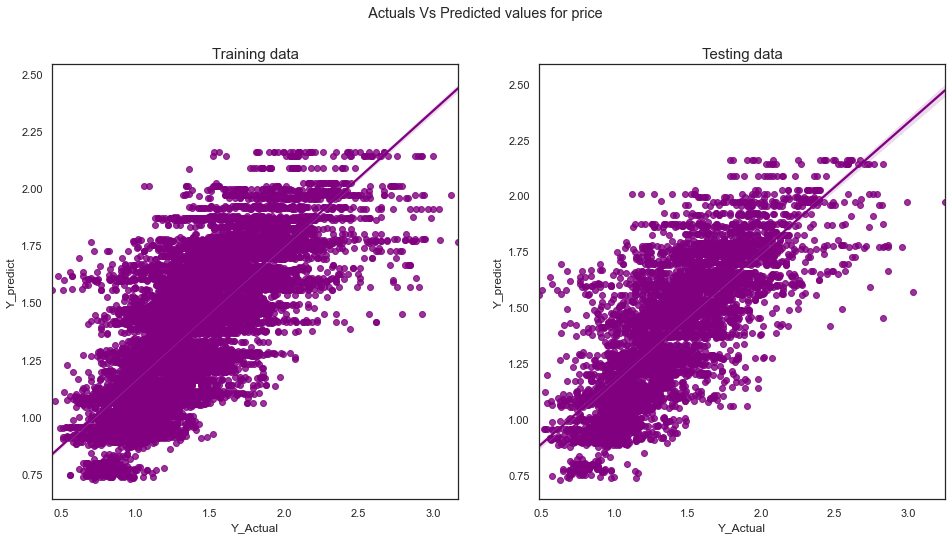

In [86]:
#visual
f,(ax1, ax2) = plt.subplots(1,2,figsize=(16,8))
sns.regplot(x='Y_Actual', y= 'Y_predict', data= train_plot, ax=ax1, color='purple')
sns.regplot(x='Y_Actual', y= 'Y_predict', data= test_plot, ax=ax2, color='purple')
f.suptitle(' Actuals Vs Predicted values for price')
ax1.set_title('Training data', fontsize=15)
ax2.set_title('Testing data', fontsize=15)

The actual and predicted values are not too far from the fitted line

In [87]:
#Score model on testing data
lr.score(X_test, y_test)

0.5784528137187336

In [88]:
#Score model on training dat
lr.score(X_train, y_train)

0.5855919467638275

In [93]:
# Find Error
from sklearn.metrics import mean_squared_error

rmsetest = mean_squared_error(y_test, y_testpreds, squared=True)
rmsrtrain = mean_squared_error(y_train, y_trainpreds, squared=True)
print('Error for testing data: ', rmsetest)
print('Error for training data: ', rmsrtrain)

Error for testing data:  0.06801168490858141
Error for training data:  0.06733377968023867


As rmse has a lower value it might indicate that the model could have a good fit

### Cross validation

In [94]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

In [95]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train = X.iloc[train, ]
    y_train = y.iloc[train, ]
    X_test = X.iloc[test, ]
    y_test = y.iloc[test, ]
    
    # Fit model with training set
    lr.fit(X_train, y_train)
    
    # Make predictions with training and test set
    train_preds = lr.predict(X_train)
    test_preds = lr.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(lr.score(X_train, y_train))
    test_scores.append(lr.score(X_test, y_test))
    
    train_rmse.append(mean_squared_error(y_train, train_preds, squared=False))
    test_rmse.append(mean_squared_error(y_test, test_preds, squared=False))

# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({'Training R2': train_scores, 
                           'Test R2': test_scores, 
                           'Training RMSE': train_rmse, 
                           'Test RMSE': test_rmse},
                          index=[i+1 for i in range(5)])

metrics_df

,Training R2,Test R2,Training RMSE,Test RMSE
1,0.585779,0.575088,0.260030,0.258894
2,0.582763,0.587766,0.259483,0.260960
3,0.587901,0.567262,0.258462,0.264888
4,0.583113,0.586370,0.259736,0.259972
5,0.582903,0.586744,0.260062,0.258788


In [96]:
metrics_df.describe()

,Training R2,Test R2,Training RMSE,Test RMSE
count,5.000000,5.000000,5.000000,5.000000
mean,0.584492,0.580646,0.259554,0.260701
std,0.002275,0.009092,0.000655,0.002503
min,0.582763,0.567262,0.258462,0.258788
25%,0.582903,0.575088,0.259483,0.258894
50%,0.583113,0.586370,0.259736,0.259972
75%,0.585779,0.586744,0.260030,0.260960
max,0.587901,0.587766,0.260062,0.264888


## Forward Feature Selection

In [97]:
## Flag intermediate output

show_steps = False   # for testing/debugging
# show_steps = False  # without showing steps

In [98]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the test data
n = X_test.shape[0]

r2_list = []
adjusted_r2_list = []

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )
        
        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for
    
    r2_list.append(best['r2'])
    adjusted_r2_list.append(best['a_r2'])

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))

Added feature type_organic with R^2 = 0.377 and adjusted R^2 = 0.377
Added feature year_2017 with R^2 = 0.409 and adjusted R^2 = 0.409
Added feature region_HartfordSpringfield with R^2 = 0.429 and adjusted R^2 = 0.428
Added feature region_SanFrancisco with R^2 = 0.449 and adjusted R^2 = 0.448
Added feature region_Houston with R^2 = 0.463 and adjusted R^2 = 0.463
Added feature region_NewYork with R^2 = 0.475 and adjusted R^2 = 0.474
Added feature region_DallasFtWorth with R^2 = 0.487 and adjusted R^2 = 0.486
Added feature region_SouthCentral with R^2 = 0.497 and adjusted R^2 = 0.496
Added feature region_Philadelphia with R^2 = 0.503 and adjusted R^2 = 0.501
Added feature region_Sacramento with R^2 = 0.509 and adjusted R^2 = 0.507
Added feature region_Charlotte with R^2 = 0.514 and adjusted R^2 = 0.513
Added feature region_Northeast with R^2 = 0.520 and adjusted R^2 = 0.518
Added feature region_RaleighGreensboro with R^2 = 0.523 and adjusted R^2 = 0.522
Added feature region_Chicago with 

## Ridge regression model

In [102]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
## Calculate Ridge Regression model

# create a model object to hold the modelling parameters
clf = Ridge()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in ridge_alphas:
    clf.set_params(alpha = a)
    clf.fit(X,y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, lr.coef_))

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.19186e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.19186e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.19186e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.19186e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.19186e-17): result may not be accurate

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.19194e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.19195e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.19196e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.19197e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.19199e-17): result may not be accurate

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.22525e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.23025e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.23597e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24255e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.25011e-17): result may not be accurate

In [100]:
X.shape

(18249, 65)

In [101]:
y.shape

(18249,)